In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [59]:
dff = pd.read_csv('api_data_aadhar_enrolment_500000_1000000.csv')

In [60]:
df = dff.copy()

In [61]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,26-10-2025,Andhra Pradesh,Nalgonda,508004,0,1,0
1,26-10-2025,Andhra Pradesh,Nalgonda,508238,1,0,0
2,26-10-2025,Andhra Pradesh,Nalgonda,508278,1,0,0
3,26-10-2025,Andhra Pradesh,Nandyal,518432,0,1,0
4,26-10-2025,Andhra Pradesh,Nandyal,518543,1,0,0


In [ ]:
df.shape 
# there are total 500000 rows and 7 columns in the dataset

(500000, 7)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            500000 non-null  object
 1   state           500000 non-null  object
 2   district        500000 non-null  object
 3   pincode         500000 non-null  int64 
 4   age_0_5         500000 non-null  int64 
 5   age_5_17        500000 non-null  int64 
 6   age_18_greater  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


In [64]:
df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,518077.362504,3.009628,1.082962,0.089984
std,204615.861812,4.658289,2.537596,1.073745
min,100000.000000,0.000000,0.000000,0.000000
25%,365541.000000,1.000000,0.000000,0.000000
50%,517583.000000,2.000000,0.000000,0.000000
75%,695023.000000,3.000000,1.000000,0.000000
max,855456.000000,210.000000,97.000000,318.000000


data cleaning

In [65]:
# Removing duplicate rows based on 'date' and 'pincode' columns
df = df.drop_duplicates(subset=["date", "pincode"], keep="first")

In [66]:
df.shape   
# there were 71493 duplicate rows. 
# So, after removing duplicates, there are 428507 rows remaining. (initially there were 500000 rows)

(428507, 7)

In [67]:
# Removing full duplicate rows
df = df.drop_duplicates(keep="first")

In [68]:
df.shape
# there were no full duplicate rows.

(428507, 7)

In [69]:
df.isna().sum()    # no missing values in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [70]:
(df == "").sum()  # no empty strings in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [71]:
(df == " ").sum() # no empty strings with space in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [72]:
(df.astype(str).apply(lambda x: x.str.strip() == "").sum()) # no empty strings with leading or trailing spaces in any column

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [73]:
df[df["pincode"].astype(str).str.len() != 6]   # no invalid pincodes.

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater


In [75]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,26-10-2025,Andhra Pradesh,Nalgonda,508004,0,1,0
1,26-10-2025,Andhra Pradesh,Nalgonda,508238,1,0,0
2,26-10-2025,Andhra Pradesh,Nalgonda,508278,1,0,0
3,26-10-2025,Andhra Pradesh,Nandyal,518432,0,1,0
4,26-10-2025,Andhra Pradesh,Nandyal,518543,1,0,0


In [76]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [ ]:
df['state'].value_counts() # the state names arent consistent. 

state
Uttar Pradesh                               47936
Tamil Nadu                                  41955
Maharashtra                                 33703
West Bengal                                 28825
Karnataka                                   27942
Rajasthan                                   25907
Andhra Pradesh                              25691
Bihar                                       25649
Madhya Pradesh                              23009
Kerala                                      20533
Gujarat                                     20300
Odisha                                      17926
Telangana                                   14160
Assam                                       13487
Jharkhand                                    9473
Punjab                                       9031
Haryana                                      7676
Chhattisgarh                                 7471
Himachal Pradesh                             5430
Jammu and Kashmir                           

In [78]:
df['state_clean'] = df['state'].str.lower().str.strip().str.replace(r'[^a-z]', '', regex=True)

In [79]:
df['state_clean'].value_counts()

state_clean
uttarpradesh                         47936
tamilnadu                            41955
maharashtra                          33703
westbengal                           28833
karnataka                            27942
rajasthan                            25907
andhrapradesh                        25692
bihar                                25649
madhyapradesh                        23009
kerala                               20533
gujarat                              20300
odisha                               17926
telangana                            14160
assam                                13487
jharkhand                             9473
punjab                                9031
haryana                               7676
chhattisgarh                          7471
himachalpradesh                       5430
jammuandkashmir                       4993
uttarakhand                           4798
delhi                                 2844
tripura                               1695

In [80]:
valid_states = [
    "andhrapradesh","arunachalpradesh","assam","bihar","chhattisgarh",
    "goa","gujarat","haryana","himachalpradesh","jharkhand",
    "karnataka","kerala","madhyapradesh","maharashtra","manipur",
    "meghalaya","mizoram","nagaland","odisha","punjab",
    "rajasthan","sikkim","tamilnadu","telangana","tripura",
    "uttarpradesh","uttarakhand","westbengal",
    "jammuandkashmir","delhi"
]

In [81]:
import difflib

In [82]:
df['state_final'] = df['state_clean'].apply(
    lambda x: difflib.get_close_matches(x, valid_states, n=1, cutoff=0.75)[0]
    if difflib.get_close_matches(x, valid_states, n=1, cutoff=0.75)
    else x
)

In [83]:
df['state_final'].value_counts()

state_final
uttarpradesh                         47936
tamilnadu                            41955
maharashtra                          33703
westbengal                           28836
karnataka                            27942
rajasthan                            25907
andhrapradesh                        25692
bihar                                25649
madhyapradesh                        23009
kerala                               20533
gujarat                              20300
odisha                               17926
telangana                            14160
assam                                13487
jharkhand                             9473
punjab                                9031
haryana                               7676
chhattisgarh                          7471
himachalpradesh                       5430
jammuandkashmir                       5036
uttarakhand                           4798
delhi                                 2844
tripura                               1695

In [84]:
# fixing old names and merged UTs
df['state_final'] = df['state_final'].replace({
    "orissa": "odisha",
    "pondicherry": "puducherry",
    "andamannicobarislands": "andamanandnicobarislands",
    "damananddiu": "dadraandnagarhavelianddamananddiu",
    "damandiu": "dadraandnagarhavelianddamananddiu",
    "dadraandnagarhaveli": "dadraandnagarhavelianddamananddiu",
    "dadranagarhaveli": "dadraandnagarhavelianddamananddiu"
})
df['state_final'].value_counts()

state_final
uttarpradesh                         47936
tamilnadu                            41955
maharashtra                          33703
westbengal                           28836
karnataka                            27942
rajasthan                            25907
andhrapradesh                        25692
bihar                                25649
madhyapradesh                        23009
kerala                               20533
gujarat                              20300
odisha                               18713
telangana                            14160
assam                                13487
jharkhand                             9473
punjab                                9031
haryana                               7676
chhattisgarh                          7471
himachalpradesh                       5430
jammuandkashmir                       5036
uttarakhand                           4798
delhi                                 2844
tripura                               1695

In [85]:
df = df[df['state_final'].str.len() > 0]

In [87]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_clean,state_final
0,2025-10-26,Andhra Pradesh,Nalgonda,508004,0,1,0,andhrapradesh,andhrapradesh
1,2025-10-26,Andhra Pradesh,Nalgonda,508238,1,0,0,andhrapradesh,andhrapradesh
2,2025-10-26,Andhra Pradesh,Nalgonda,508278,1,0,0,andhrapradesh,andhrapradesh
3,2025-10-26,Andhra Pradesh,Nandyal,518432,0,1,0,andhrapradesh,andhrapradesh
4,2025-10-26,Andhra Pradesh,Nandyal,518543,1,0,0,andhrapradesh,andhrapradesh


In [88]:
df = df[['date', 'state_final', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']]

In [89]:
df.head()

,date,state_final,pincode,age_0_5,age_5_17,age_18_greater
0,2025-10-26,andhrapradesh,508004,0,1,0
1,2025-10-26,andhrapradesh,508238,1,0,0
2,2025-10-26,andhrapradesh,508278,1,0,0
3,2025-10-26,andhrapradesh,518432,0,1,0
4,2025-10-26,andhrapradesh,518543,1,0,0


In [90]:
df['total_enrolments'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

In [92]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month   
df['year'] = df['date'].dt.year

In [93]:
df.head()

,date,state_final,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,day,month,year
0,2025-10-26,andhrapradesh,508004,0,1,0,1,26,10,2025
1,2025-10-26,andhrapradesh,508238,1,0,0,1,26,10,2025
2,2025-10-26,andhrapradesh,508278,1,0,0,1,26,10,2025
3,2025-10-26,andhrapradesh,518432,0,1,0,1,26,10,2025
4,2025-10-26,andhrapradesh,518543,1,0,0,1,26,10,2025


In [ ]:
# integrity check- does pincode match only one district??
df.groupby('pincode')['state_final'].nunique().max()
# np.int64(2). atleast one pincode maps to 2 states. 

np.int64(2)

In [97]:
bad_pincodes = df.groupby('pincode')['state_final'].nunique()
bad_pincodes = bad_pincodes[bad_pincodes > 1]
bad_pincodes

pincode
160014    2
160055    2
160103    2
194101    2
194102    2
         ..
737133    2
781129    2
781131    2
783123    2
783134    2
Name: state_final, Length: 542, dtype: int64

In [98]:
df[df['pincode'].isin(bad_pincodes.index)][['pincode', 'state_final']].sort_values('pincode')

,pincode,state_final
217211,160014,chandigarh
286550,160014,punjab
41856,160014,punjab
238214,160014,punjab
67933,160014,chandigarh
...,...,...
160454,783134,assam
238058,783134,meghalaya
7478,783134,meghalaya
422100,783134,assam


In [ ]:
# fixing using majority state for those pincodes
for pin in bad_pincodes.index:
    correct_state = (df[df['pincode'] == pin]['state_final'].value_counts().idxmax())
    df.loc[df['pincode'] == pin, 'state_final'] = correct_state

In [ ]:
df.groupby('pincode')['state_final'].nunique().max()  # fixed. 

np.int64(1)

In [ ]:
df.head()  # data cleaning complete.

,date,state_final,pincode,age_0_5,age_5_17,age_18_greater,total_enrolments,day,month,year
0,2025-10-26,telangana,508004,0,1,0,1,26,10,2025
1,2025-10-26,telangana,508238,1,0,0,1,26,10,2025
2,2025-10-26,telangana,508278,1,0,0,1,26,10,2025
3,2025-10-26,andhrapradesh,518432,0,1,0,1,26,10,2025
4,2025-10-26,andhrapradesh,518543,1,0,0,1,26,10,2025


EDA & Visualization

In [ ]:
df['total_enrolments'].describe()

count    428495.000000
mean          4.240442
std           6.298868
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         320.000000
Name: total_enrolments, dtype: float64

In [116]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Density Plot of Total Enrolments')

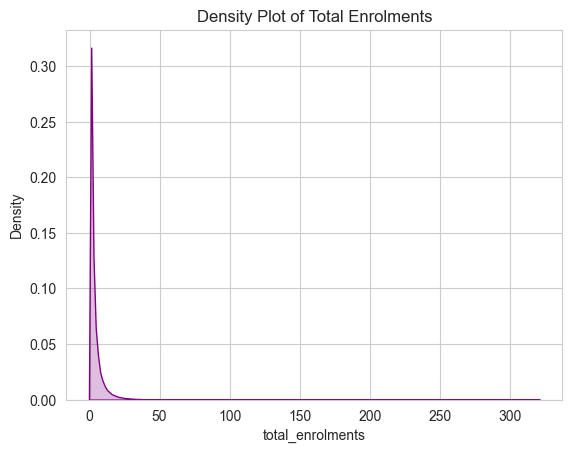

In [117]:
sns.kdeplot(df['total_enrolments'], fill=True, color = 'purple')
plt.title('Density Plot of Total Enrolments')

# Most areas have very low Aadhaar enrolments (1–5 people).
# A few areas show very high enrolments (100–300), which are important and meaningful events.
# The total enrolments decrease gradually as we move towards higher enrolment numbers.

In [ ]:
# distribution of age groups
df[['age_0_5', 'age_5_17', 'age_18_greater']].describe()

# looking at the mean-- 
# Aadhaar enrolment is highest among children aged 0–5 years. This indicates that parents increasingly enrol infants early, 
# likely due to requirements for government schemes, healthcare benefits, and school admissions.
# Enrolments for the 5–17 age group are moderate and represent students completing Aadhaar for examinations, scholarships, and school records.
# the 18+ age group has the lowest daily enrolments, which aligns with real-world patterns because most adults already possess
# Aadhaar card.

,age_0_5,age_5_17,age_18_greater
count,428495.000000,428495.000000,428495.000000
mean,3.033303,1.113964,0.093175
std,4.677139,2.586263,1.105335
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,210.000000,97.000000,318.000000


Text(0, 0.5, 'Average Enrolments')

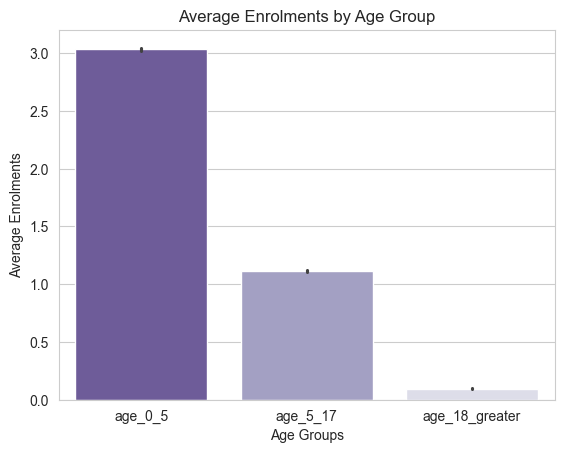

In [165]:
sns.barplot(df[['age_0_5', 'age_5_17', 'age_18_greater']], palette='Purples_r')
plt.title('Average Enrolments by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average Enrolments')

Text(0.5, 1.0, 'Daily Aadhaar Enrolments Over Time')

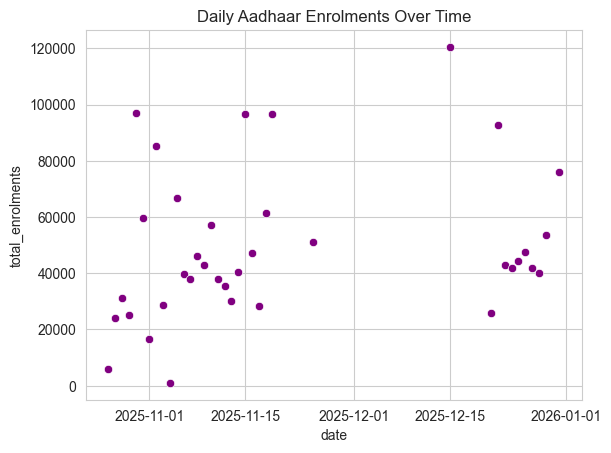

In [ ]:
# How do daily enrolments change over time?
daily_enrolments = df.groupby('date')['total_enrolments'].sum().reset_index()
daily_enrolments = pd.DataFrame(daily_enrolments)
sns.scatterplot(data=daily_enrolments, x='date', y='total_enrolments', color='purple')
plt.title('Daily Aadhaar Enrolments Over Time')

# the Aadhaar enrolments show high variability with no clear upward or downward trend. 
# Certain days experience sharp spikes (peaking around mid-December), likely due to special enrolment drives or administrative events, 
# while some days show very low counts, possibly due to holidays or operational closures. 
# Overall, daily patterns are irregular rather than stable.

In [ ]:
# monthly trend
monthly_enrolments = df.groupby(['month'])['total_enrolments'].sum().reset_index()
monthly_enrolments = pd.DataFrame(monthly_enrolments)
monthly_enrolments.sort_values('total_enrolments', ascending=False)

# most of the enrolments happened in the month of november, followed by december. least in october.

,month,total_enrolments
1,11,947631
2,12,626960
0,10,242417


C:\Users\Mrunmayee Potdar\AppData\Local\Temp\ipykernel_15724\3998486017.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = monthly_enrolments.sort_values(by='total_enrolments', ascending=False), x='month', y='total_enrolments', palette='Purples_r')


Text(0.5, 0, 'Month')

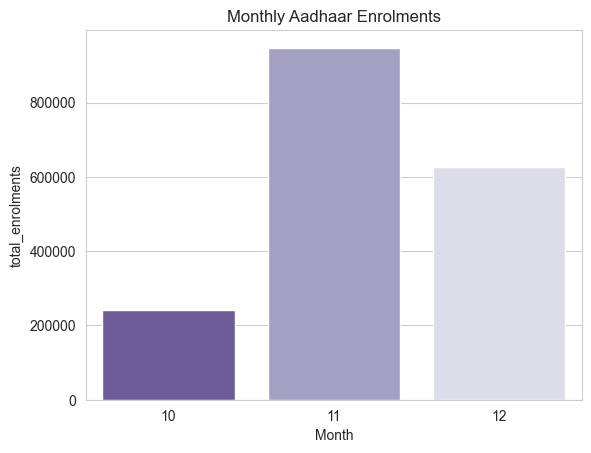

In [164]:
sns.barplot(data = monthly_enrolments.sort_values(by='total_enrolments', ascending=False), x='month', y='total_enrolments', palette='Purples_r')
plt.title('Monthly Aadhaar Enrolments')
plt.xlabel('Month')

In [ ]:
# weekly trends
df['day_of_week'] = df['date'].dt.day_name()
weekly_enrolments = df.groupby('day_of_week')['total_enrolments'].sum().reset_index()
weekly_enrolments = pd.DataFrame(weekly_enrolments)
weekly_enrolments.sort_values('total_enrolments', ascending=False)

# most of the enrolments happened on Monday, followed by Wednesday and Sunday. Least on Saturday and Friday.

,day_of_week,total_enrolments
1,Monday,404892
6,Wednesday,341756
3,Sunday,247483
5,Tuesday,225156
4,Thursday,210993
2,Saturday,201184
0,Friday,185544


C:\Users\Mrunmayee Potdar\AppData\Local\Temp\ipykernel_15724\2035203257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = weekly_enrolments.sort_values(by='total_enrolments', ascending=False), y='day_of_week', x='total_enrolments', palette='Purples_r')


<Axes: xlabel='total_enrolments', ylabel='day_of_week'>

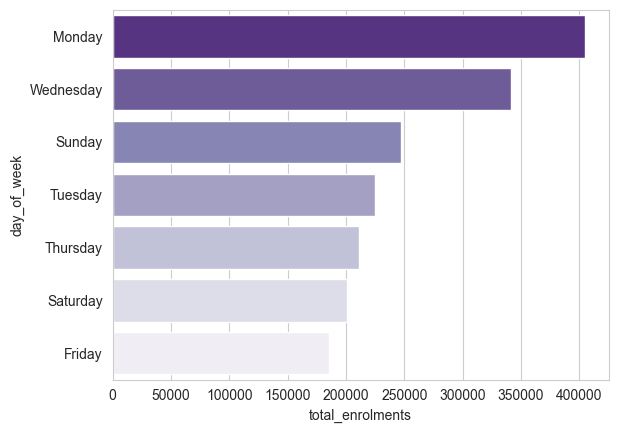

In [161]:
sns.barplot(data = weekly_enrolments.sort_values(by='total_enrolments', ascending=False), y='day_of_week', x='total_enrolments', palette='Purples_r')

In [ ]:
# Which states have highest/lowest enrolments?
state_enrol = df.groupby('state_final')['total_enrolments'].sum().reset_index()
state_enrol = pd.DataFrame(state_enrol)
state_enrol = state_enrol.sort_values(by='total_enrolments', ascending=False)
state_enrol

# highest no. of enrolments in uttarpradesh, followed by madhya pradesh and bihar.
# least in andaman and nicobar islands, ladakh and lakshadweep.
# this aligns with population distribution patterns in India, where more populous states tend to have higher enrolment numbers.

,state_final,total_enrolments
34,uttarpradesh,311295
19,madhyapradesh,193836
4,bihar,187602
28,rajasthan,131545
20,maharashtra,125623
35,westbengal,120443
30,tamilnadu,102034
15,karnataka,76175
10,gujarat,73471
14,jharkhand,59426


In [190]:
# Top and bottom 10 districts — who are they?
state_enrol.head(10)

,state_final,total_enrolments
34,uttarpradesh,311295
19,madhyapradesh,193836
4,bihar,187602
28,rajasthan,131545
20,maharashtra,125623
35,westbengal,120443
30,tamilnadu,102034
15,karnataka,76175
10,gujarat,73471
14,jharkhand,59426


In [191]:
state_enrol.tail(10)

,state_final,total_enrolments
23,mizoram,1542
5,chandigarh,1330
2,arunachalpradesh,1251
9,goa,1064
26,puducherry,1044
29,sikkim,436
7,dadraandnagarhavelianddamananddiu,284
0,andamanandnicobarislands,225
17,ladakh,147
18,lakshadweep,104


C:\Users\Mrunmayee Potdar\AppData\Local\Temp\ipykernel_15724\4157619719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_enrol, y='state_final', x='total_enrolments', palette='Purples_r')


Text(0.5, 1.0, 'Aadhaar Enrolments by State')

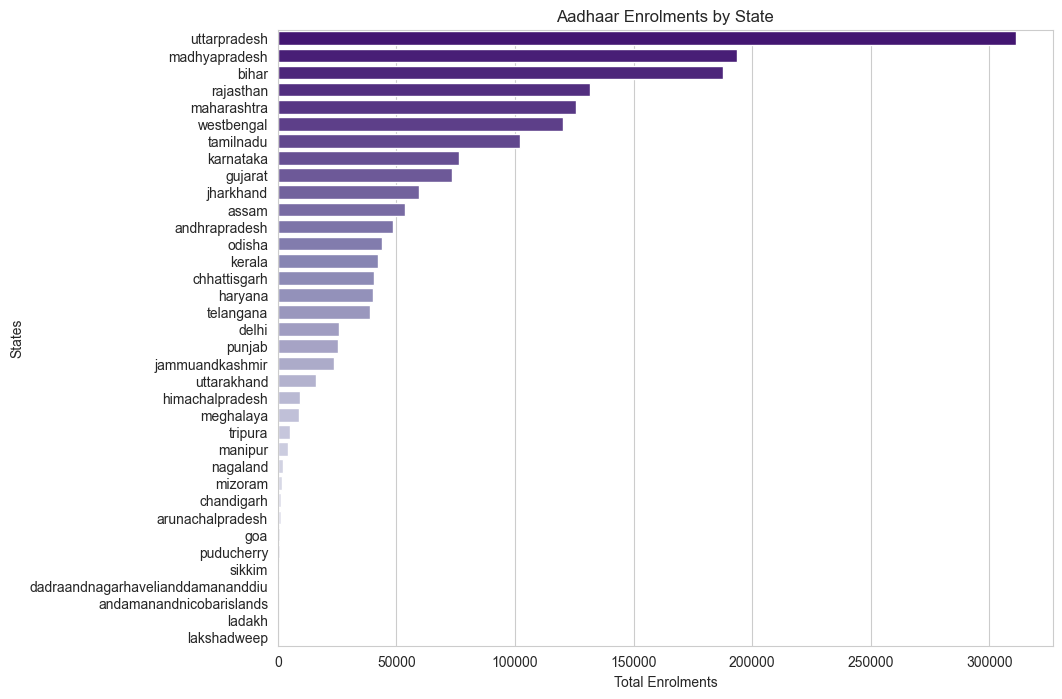

In [175]:
plt.figure(figsize=(10,8))
sns.barplot(data=state_enrol, y='state_final', x='total_enrolments', palette='Purples_r')
plt.xlabel('Total Enrolments')
plt.ylabel('States')
plt.title('Aadhaar Enrolments by State')

In [178]:
# aadhar enrolments by state by age group
state_age_enrol = df.groupby('state_final')[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolments']].sum().reset_index()
state_age_enrol = pd.DataFrame(state_age_enrol)
state_age_enrol = state_age_enrol.sort_values(by='total_enrolments', ascending=False)
state_age_enrol

,state_final,age_0_5,age_5_17,age_18_greater,total_enrolments
34,uttarpradesh,174588,132446,4261,311295
19,madhyapradesh,160196,30475,3165,193836
4,bihar,87217,98589,1796,187602
28,rajasthan,86131,42369,3045,131545
20,maharashtra,105212,18006,2405,125623
35,westbengal,92080,25196,3167,120443
30,tamilnadu,83620,17777,637,102034
15,karnataka,66157,8530,1488,76175
10,gujarat,59044,11068,3359,73471
14,jharkhand,39236,19829,361,59426


In [ ]:
# Which pincodes show unusual behaviour
# outlier pincodes.
pincode_df = df.groupby('pincode')['total_enrolments'].sum().reset_index()
q1 = pincode_df['total_enrolments'].quantile(0.25)
q3 = pincode_df['total_enrolments'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
unusual_pincodes = pincode_df[(pincode_df["total_enrolments"] < lower_bound) | (pincode_df["total_enrolments"] > upper_bound)]
unusual_pincodes

# Pincodes with extremely high enrolments may indicate urban population hubs or large number of centres.
# Pincodes with extremely low enrolments may indicate rural areas or missing centres.

,pincode,total_enrolments
5,110006,547
6,110007,259
7,110008,265
16,110017,341
17,110018,481
...,...,...
19330,855108,471
19331,855113,829
19333,855115,262
19334,855116,361


In [188]:
unusual_pincodes.head()

,pincode,total_enrolments
5,110006,547
6,110007,259
7,110008,265
16,110017,341
17,110018,481


Text(0.5, 1.0, 'Aadhaar Enrolments for Age 0-5 Over Time')

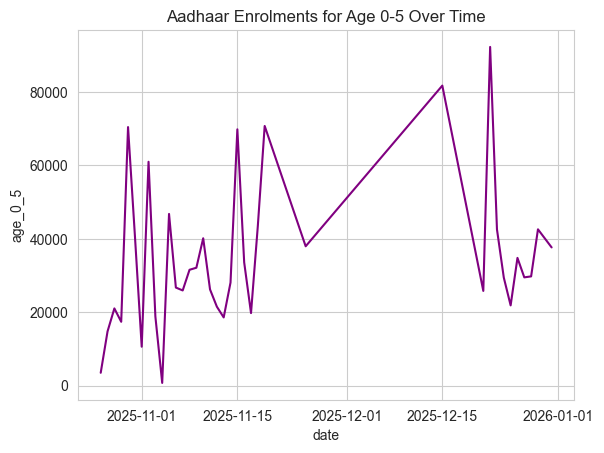

In [ ]:
# Do 0–5 age registrations increase or decrease over time?
age_0_5_enrolments = df.groupby('date')['age_0_5'].sum().reset_index()
age_0_5_enrolments = pd.DataFrame(age_0_5_enrolments)
sns.lineplot(data=age_0_5_enrolments, x='date', y='age_0_5', color='purple')
plt.title('Aadhaar Enrolments for Age 0-5 Over Time')

# we cant say if there is an increase or decrease. the trend is irregular with spikes and dips.

In [ ]:
# states with unusually high 18+ enrolments
unusual_18plus = (
    df.groupby("pincode")
      .agg({
          "age_18_greater": "sum",
          "state_final": "first",
      }).reset_index().sort_values("age_18_greater", ascending=False))
unusual_18plus.head(10)
# states in meghalaya, punjab, chhattisgarh, rajasthan, assam have unusually high 18+ enrolments.

,pincode,age_18_greater,state_final
17823,793120,603,meghalaya
739,144601,325,punjab
17822,793119,306,meghalaya
17824,793121,303,meghalaya
8136,494444,193,chhattisgarh
17800,793015,192,meghalaya
4462,342012,179,rajasthan
17816,793110,170,meghalaya
17470,784505,166,assam
17795,793009,162,meghalaya


In [ ]:
# Which districts are strong in child enrolments

child_enrolments = df.groupby('pincode').agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'state_final': 'first'
}).reset_index().sort_values(by=['age_0_5', 'age_5_17'], ascending=False)
child_enrolments.head(10)

# districts in UP, MP, Delhi, Haryana, Maharashtra show strong child enrolments.

,pincode,age_0_5,age_5_17,state_final
2626,244001,1955,574,uttarpradesh
2794,247001,1429,411,uttarpradesh
7317,455001,1409,119,madhyapradesh
2916,250002,1364,744,uttarpradesh
82,110086,1363,194,delhi
7352,457001,1305,214,madhyapradesh
144,122508,1294,77,haryana
57,110059,1245,247,delhi
6653,423203,1152,443,maharashtra
6560,421302,1130,308,maharashtra


<Axes: xlabel='date'>

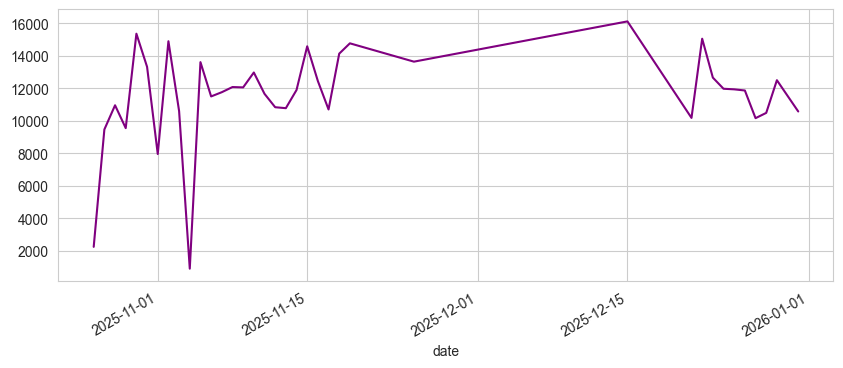

In [ ]:
# Are there dates with sudden huge spikes

df['date'].value_counts().sort_index().plot(kind='line', color='purple', figsize=(10,4))

# Some dates have very high counts and some have very low counts. 
# This means the data was not added evenly every day — it was uploaded in batches. 
# Those dates are unusual and show abnormal activity.

In [ ]:
# Are there pincodes with always-zero enrolments
zero_enrolment_pincodes = df.groupby('pincode')['total_enrolments'].sum().reset_index()
zero_enrolment_pincodes = zero_enrolment_pincodes[zero_enrolment_pincodes['total_enrolments'] == 0]
zero_enrolment_pincodes

# no such pincodes exist.

,pincode,total_enrolments


In [212]:
# pincodes missing from  a long time.
days_present = df.groupby('pincode')['date'].nunique()
total_days = df['date'].nunique()
days_absent = total_days - days_present
days_absent.sort_values(ascending=False).head()

pincode
843162    36
844103    36
848116    36
233002    36
454350    36
Name: date, dtype: int64

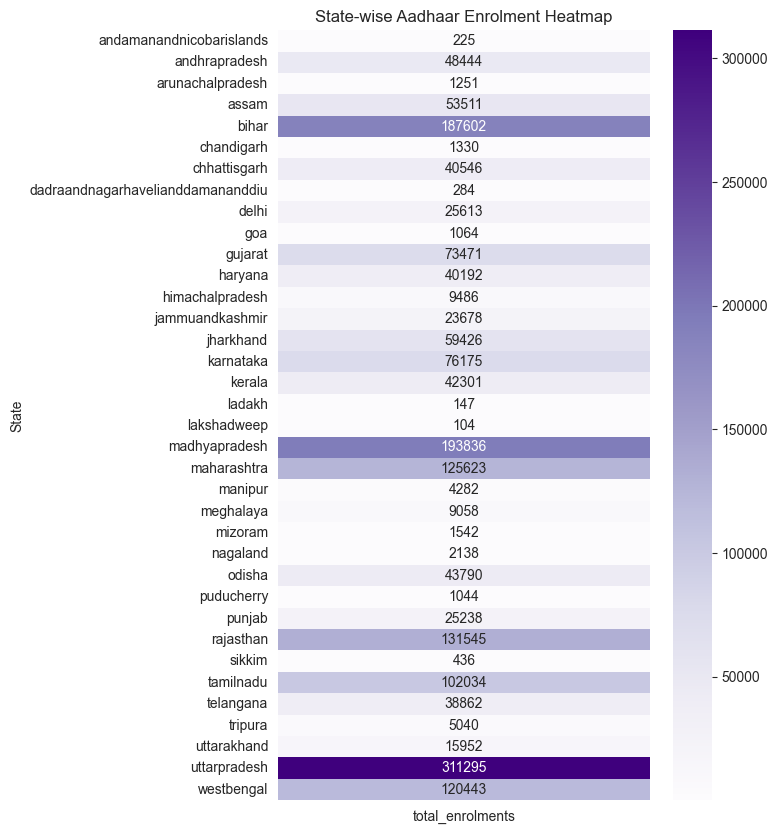

In [216]:
# state wise enrollment heatmap
state_data = df.groupby('state_final')['total_enrolments'].sum().reset_index()
heat = state_data.pivot_table(values='total_enrolments', index='state_final')
plt.figure(figsize=(6, 10))
sns.heatmap(heat, cmap="Purples", annot=True, fmt=".0f")
plt.title("State-wise Aadhaar Enrolment Heatmap")
plt.xlabel("")
plt.ylabel("State")
plt.show()

Text(0.5, 1.0, 'Overall Age Group Share in Aadhaar Enrolments')

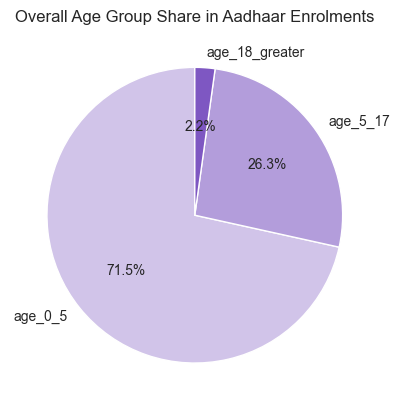

In [219]:
# Pie chart of overall age-group share.
age_group_totals = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
age_group_totals.plot.pie(autopct='%1.1f%%', colors=['#d1c4e9', '#b39ddb', '#7e57c2'], startangle=90)
plt.title('Overall Age Group Share in Aadhaar Enrolments')